In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np 

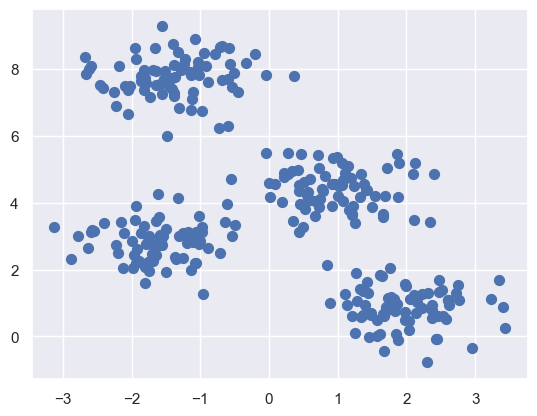

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std= 0.60, random_state=0)
plt.scatter(X[:, 0], X[:,1], s= 50)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
y_kmeans

array([0, 3, 1, 3, 0, 0, 2, 1, 3, 3, 2, 3, 1, 3, 0, 1, 1, 0, 2, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 0, 1, 2, 1, 1,
       2, 2, 3, 2, 3, 0, 2, 0, 3, 0, 0, 2, 3, 2, 3, 0, 3, 1, 3, 2, 2, 2,
       3, 0, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 0, 3, 0, 1, 0, 0, 3, 1, 0, 1,
       3, 3, 1, 0, 3, 2, 2, 1, 0, 0, 1, 2, 3, 0, 3, 0, 1, 0, 0, 1, 3, 1,
       2, 2, 0, 3, 0, 1, 3, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2,
       2, 0, 3, 2, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 1,
       0, 2, 3, 2, 0, 1, 3, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 3, 0, 1, 2, 3,
       0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 3, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 3, 1, 2, 0, 2, 1, 3, 2, 3, 1, 3, 1, 2, 1, 1, 3, 2, 2, 0, 0, 1,
       3, 0, 0, 2, 0, 2, 1, 3, 3, 1, 1, 3, 1, 0, 2, 1, 0, 2, 3, 2, 0, 1,
       0, 3, 3, 3, 3, 2, 2, 3, 1, 2, 0, 1, 2, 2, 2, 0, 0, 3, 1, 1, 2, 0,
       3, 2, 1, 3, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0,
       3, 2, 3, 1, 0, 0, 3, 3, 3, 0, 0, 1, 3, 2])

In [5]:
from sklearn.metrics import pairwise_distances_argmin

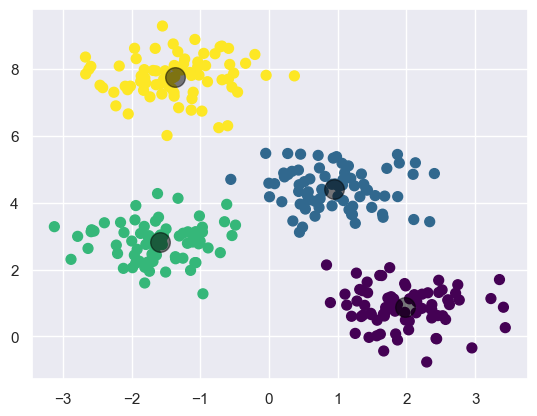

In [6]:
def find_clusters(X, n_clusters, rseed =2):
    # Randomly choose clusters. 
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center.
        labels = pairwise_distances_argmin(X,centers)
        # Find new centers from the means of points. 
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # Check for convergence. 
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels 
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans, s=50, cmap= 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c= 'black', s=200, alpha= 0.5);
        

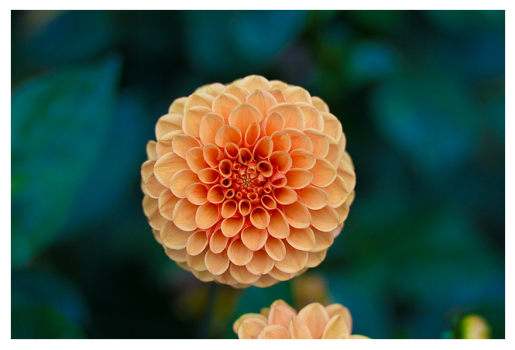

In [7]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks = [], yticks= [])
ax.imshow(china);

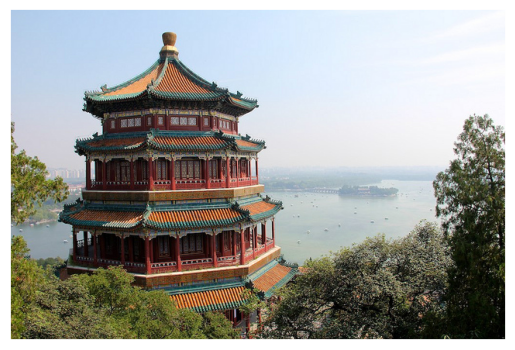

In [7]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks= [])
ax.imshow(china);

In [8]:
# Returns the dimensions of the array. 
china.shape

(427, 640, 3)

In [9]:
# Reshape the data to [n_samples x n_features], and rescale teh colors so that they lie between 0 and 1. 
data = china / 255.0 
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [10]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [11]:
# Visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency. 
def plot_pixels(data, title, colors= None, N = 10000): 
    if colors is None: 
        colors = data
    # Choose a random subset 
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0,1))

    ax[1].scatter(R, G, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0,1), ylim = (0,1))
    
    fig.suptitle(title, size = 20); 

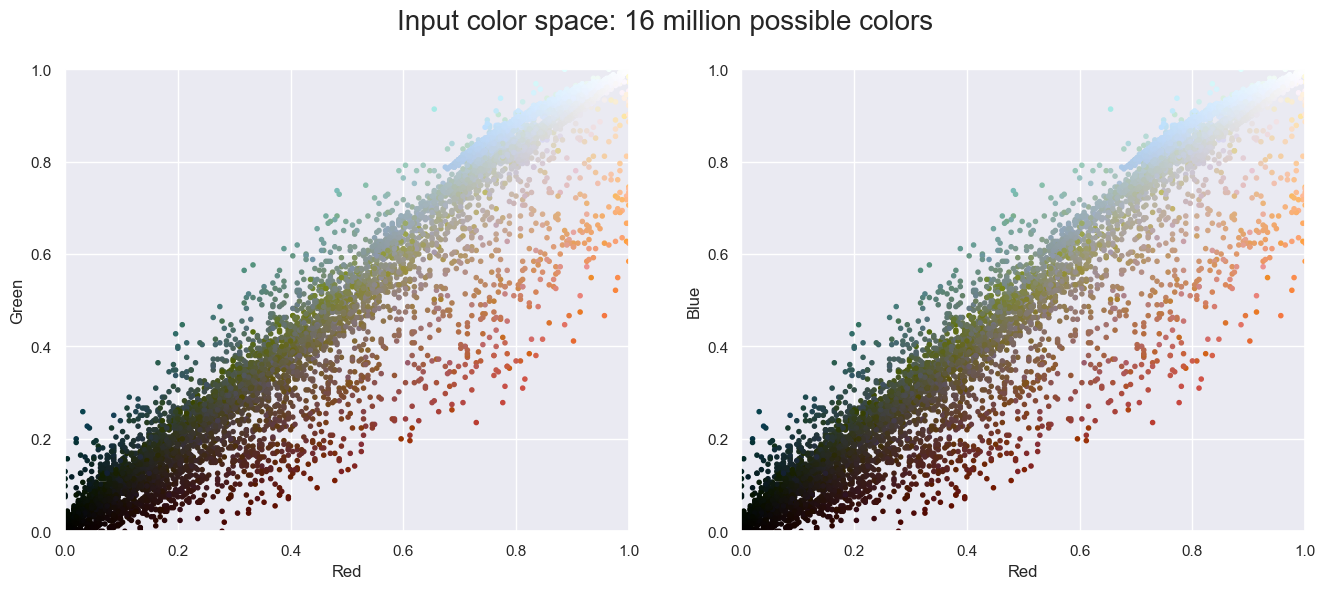

In [12]:
plot_pixels(data, title ='Input color space: 16 million possible colors')

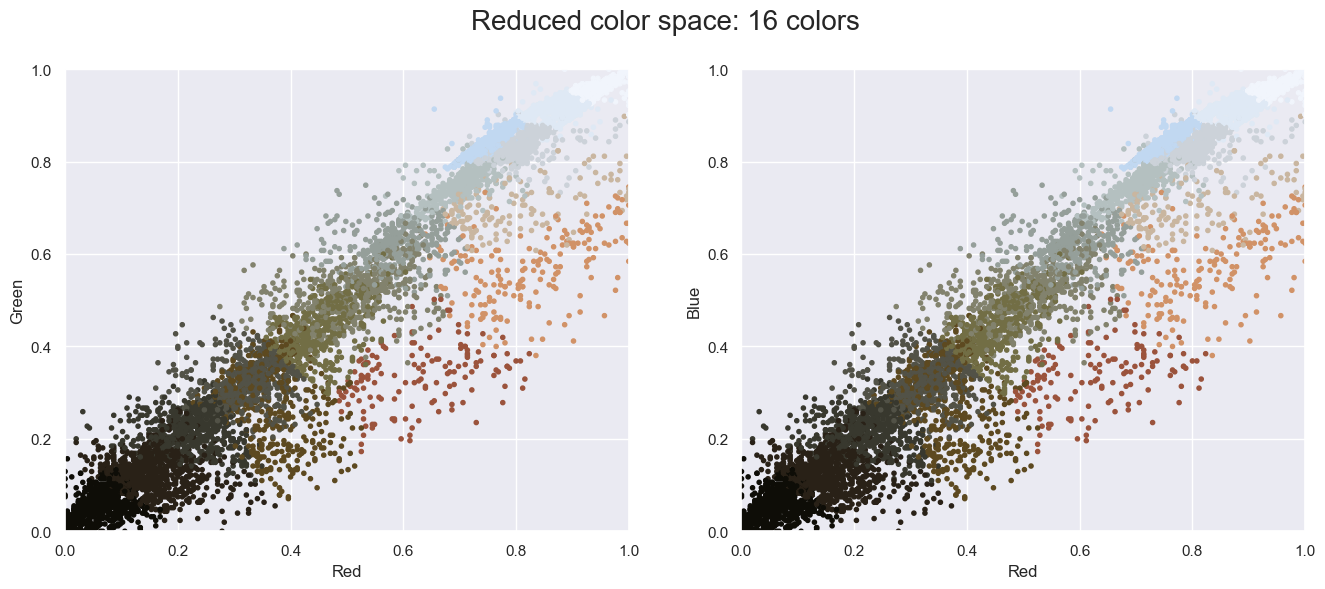

In [13]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors = new_colors, title = 'Reduced color space: 16 colors')

Text(0.5, 1.0, '16 color Image')

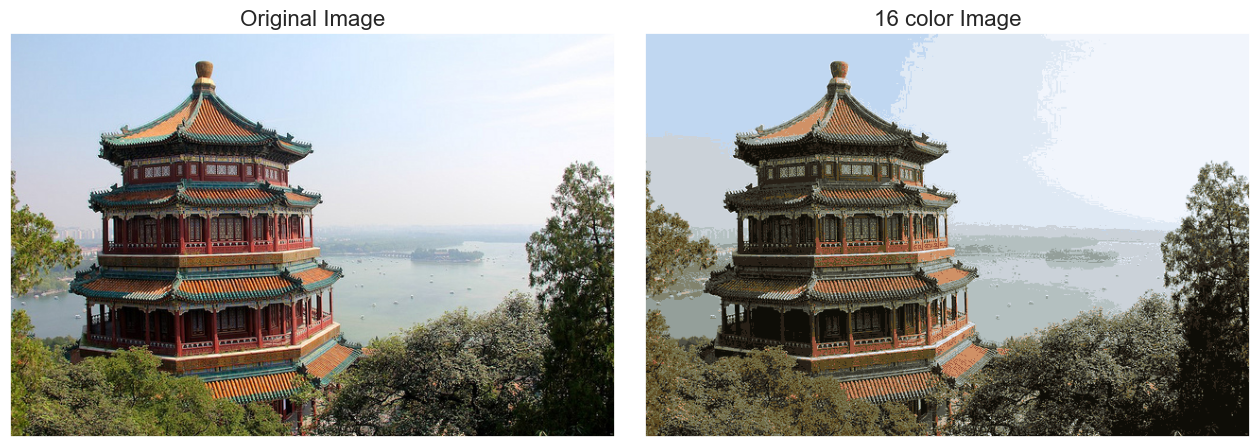

In [14]:
china_recolored   = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks=[], yticks  =[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color Image', size = 16)